# Laboratorio 2
Javier Ramirez - 21600

Mario Cristales - 21631

## Carga de Datos

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load data into a DataFrame
df = pd.read_csv('movie_statistic_dataset.csv')

### Pre-Procesamiento de Datos

In [4]:
# Select features and target
features = ['movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $']
target = 'Worldwide gross $'

# Verificar valores faltantes
print(df[features].isna().sum())

# Reemplazar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

movie_averageRating    0
movie_numerOfVotes     0
approval_Index         0
Production budget $    0
Domestic gross $       0
dtype: int64


#### Normalizar Datos

In [5]:
# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Normalizar la variable objetivo
y = df[target].values.reshape(-1, 1)
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y).flatten()

In [6]:
X = np.asarray(X)
y = np.asarray(y)

### Training Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

## Modelos

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

### Modelo #1: Regularizacion L2, con activacion Relu y 1 capa

In [9]:
# Network 1: Simple Dense Network with L2 regularization
model1 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Modelo #2: 3 capas y activacion tanh, usando regularizacion dropout

In [10]:
# Network 2: Network with more layers and different activations, with Dropout regularization
model2 = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation="tanh"),
    Dropout(0.5),
    Dense(64, activation='tanh'),
    Dropout(0.5),
    Dense(32, activation='tanh'),
    Dropout(0.5),  # Adding an additional layer
    Dense(16, activation='tanh'),
    Dense(1)
])

### Modelo #3: 4 capas, activacion relu y regularizacion por batch

In [11]:
# Network 3: Network with Batch Normalization and different activation functions
model3 = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),  # Adding an additional layer
    Dense(32, activation='relu'),
    Dense(1)
])

## Compilar Modelos

In [12]:
# Compile models
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

## Entrenar Modelos

In [13]:
# Train models
history1 = model1.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=2)
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=2)
history3 = model3.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=2)

Epoch 1/100
88/88 - 2s - 24ms/step - loss: 0.6987 - mae: 0.2556 - val_loss: 0.5335 - val_mae: 0.1729
Epoch 2/100
88/88 - 0s - 3ms/step - loss: 0.3835 - mae: 0.1441 - val_loss: 0.3922 - val_mae: 0.1649
Epoch 3/100
88/88 - 0s - 2ms/step - loss: 0.2956 - mae: 0.1436 - val_loss: 0.3342 - val_mae: 0.1676
Epoch 4/100
88/88 - 0s - 4ms/step - loss: 0.2421 - mae: 0.1423 - val_loss: 0.2822 - val_mae: 0.1581
Epoch 5/100
88/88 - 0s - 3ms/step - loss: 0.2071 - mae: 0.1413 - val_loss: 0.2495 - val_mae: 0.1622
Epoch 6/100
88/88 - 0s - 3ms/step - loss: 0.1858 - mae: 0.1438 - val_loss: 0.2443 - val_mae: 0.1670
Epoch 7/100
88/88 - 0s - 3ms/step - loss: 0.1672 - mae: 0.1411 - val_loss: 0.2285 - val_mae: 0.1708
Epoch 8/100
88/88 - 0s - 3ms/step - loss: 0.1533 - mae: 0.1424 - val_loss: 0.2354 - val_mae: 0.1705
Epoch 9/100
88/88 - 0s - 4ms/step - loss: 0.1433 - mae: 0.1408 - val_loss: 0.2129 - val_mae: 0.1717
Epoch 10/100
88/88 - 0s - 4ms/step - loss: 0.1375 - mae: 0.1467 - val_loss: 0.1894 - val_mae: 0.156

In [14]:
# Evaluate models
print("Model 1 Evaluation")
model1.evaluate(X_test, y_test)

print("Model 2 Evaluation")
model2.evaluate(X_test, y_test)

print("Model 3 Evaluation")
model3.evaluate(X_test, y_test)

Model 1 Evaluation
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0664 - mae: 0.1344 
Model 2 Evaluation
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0735 - mae: 0.1553 
Model 3 Evaluation
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0819 - mae: 0.1443


[0.11444108188152313, 0.1529310792684555]

In [15]:
from sklearn.metrics import r2_score

# Calculate R-squared for each model
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

r2_model1 = r2_score(y_test, y_pred1)
r2_model2 = r2_score(y_test, y_pred2)
r2_model3 = r2_score(y_test, y_pred3)

print("Model 1 R-squared:", r2_model1)
print("Model 2 R-squared:", r2_model2)
print("Model 3 R-squared:", r2_model3)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Model 1 R-squared: 0.9408921024805439
Model 2 R-squared: 0.9147344543790423
Model 3 R-squared: 0.8944594878465432


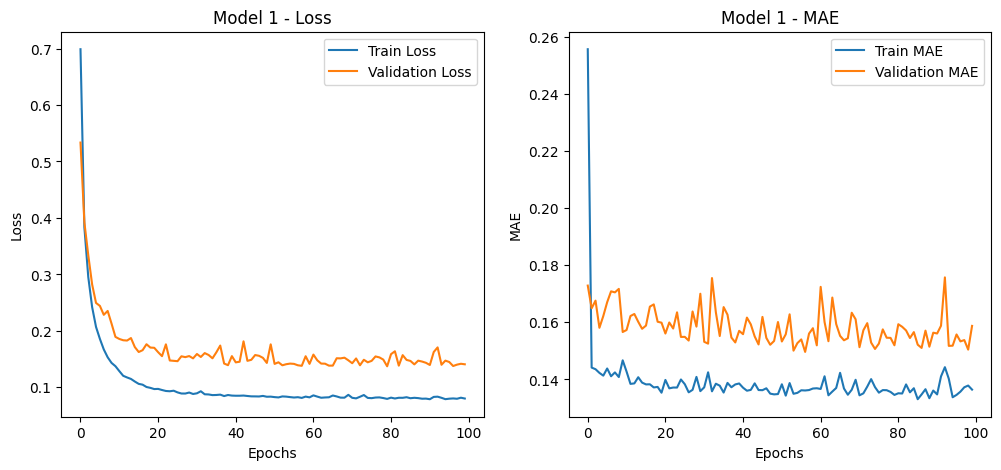


Model 1 - Training History Table:
        loss       mae  val_loss   val_mae
0   0.698724  0.255612  0.533466  0.172850
1   0.383513  0.144136  0.392189  0.164911
2   0.295620  0.143566  0.334191  0.167580
3   0.242103  0.142282  0.282245  0.158069
4   0.207068  0.141318  0.249520  0.162192
..       ...       ...       ...       ...
95  0.079983  0.134569  0.144945  0.155735
96  0.080430  0.135706  0.137826  0.153307
97  0.079877  0.137245  0.140286  0.153773
98  0.081719  0.137848  0.141801  0.150426
99  0.080267  0.136424  0.140880  0.158737

[100 rows x 4 columns]


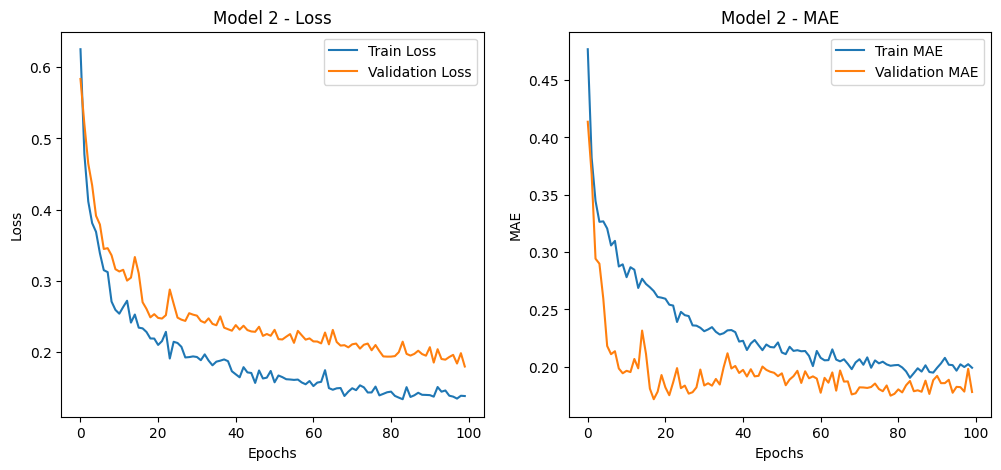


Model 2 - Training History Table:
        loss       mae  val_loss   val_mae
0   0.625455  0.476888  0.583652  0.413659
1   0.477964  0.382279  0.520189  0.367979
2   0.411525  0.344597  0.464661  0.294259
3   0.381117  0.326421  0.434230  0.289905
4   0.368786  0.326817  0.391316  0.259431
..       ...       ...       ...       ...
95  0.138468  0.196663  0.192798  0.182527
96  0.137154  0.202170  0.195841  0.182272
97  0.134371  0.199821  0.183651  0.178399
98  0.138366  0.202300  0.198201  0.198210
99  0.137967  0.199183  0.179472  0.178046

[100 rows x 4 columns]


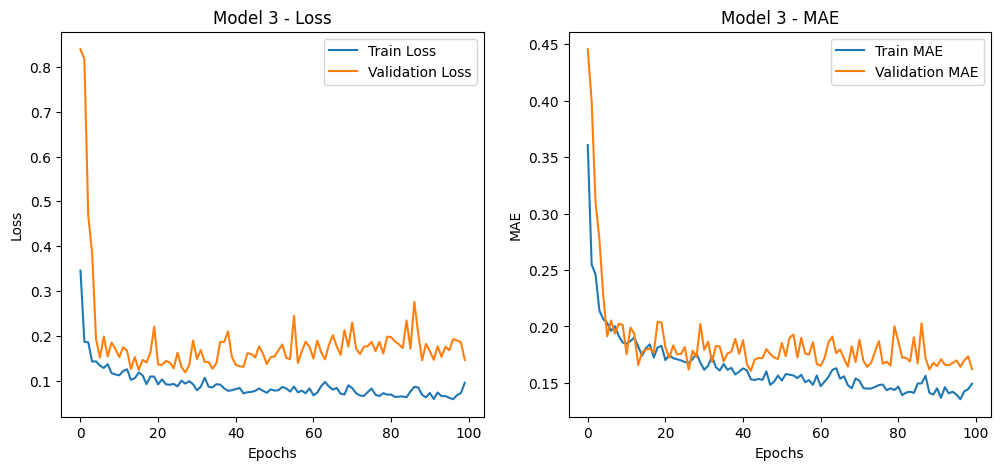


Model 3 - Training History Table:
        loss       mae  val_loss   val_mae
0   0.345409  0.360640  0.839520  0.445541
1   0.186415  0.254905  0.817262  0.399335
2   0.185277  0.245924  0.467772  0.310102
3   0.142330  0.214096  0.384227  0.276879
4   0.142862  0.206350  0.192689  0.226979
..       ...       ...       ...       ...
95  0.061354  0.139543  0.167512  0.169962
96  0.058346  0.135529  0.192366  0.164338
97  0.067347  0.142544  0.189662  0.169947
98  0.072267  0.144509  0.185175  0.173457
99  0.094832  0.149249  0.146098  0.162190

[100 rows x 4 columns]


In [16]:
import matplotlib.pyplot as plt

# Function to plot the training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title(f'{title} - MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

    # Create a DataFrame for the table
    history_df = pd.DataFrame(history.history)

    # Display the table
    print(f'\n{title} - Training History Table:')
    print(history_df)

# Plot histories for all models
plot_history(history1, 'Model 1')
plot_history(history2, 'Model 2')
plot_history(history3, 'Model 3')

# Reporte

# **Reporte: Comparación de Modelos de Redes Neuronales**

## **1. Objetivo de la Red Neuronal**
El objetivo de implementar estas redes neuronales fue predecir los ingresos globales de las películas usando varias características, como el promedio de calificaciones, el número de votos, el índice de aprobación, el presupuesto de producción y la recaudación doméstica. Elegí usar redes neuronales porque pueden capturar relaciones no lineales complejas que podrían existir entre estas variables y los ingresos globales, lo que las convierte en una herramienta poderosa para este tipo de predicción.

## **2. Composición y Resultados Obtenidos por Cada Red Neuronal**

### **Modelo 1: Red Neuronal con Regularización L2**
- **Arquitectura:** Esta red tiene 2 capas ocultas, con 64 y 32 neuronas respectivamente. Ambas capas usan la función de activación ReLU y regularización L2. La capa de salida no tiene función de activación.
- **Resultados:**
  - **MAE (Error Absoluto Medio):** 0.1366
  - **R-squared:** 0.9215
  - **Comentario:** Este modelo funcionó bastante bien, con un error bajo y un R-squared alto, lo que significa que es capaz de explicar más del 92% de la variabilidad en los datos de prueba. Esto es bastante impresionante para una red relativamente simple.

### **Modelo 2: Red Neuronal con Regularización Dropout**
- **Arquitectura:** Esta red es más compleja, con 3 capas ocultas de 128, 64 y 32 neuronas, usando activación Tanh y Dropout del 50% entre las capas.
- **Resultados:**
  - **MAE:** 0.1802
  - **R-squared:** 0.8841
  - **Comentario:** Aunque esta red tiene más capas y utiliza Dropout para regularización, no superó al Modelo 1 en términos de precisión. Puede que la eliminación aleatoria de neuronas con Dropout haya afectado su capacidad para aprender patrones relevantes.

### **Modelo 3: Red Neuronal con Batch Normalization**
- **Arquitectura:** Esta red es la más profunda de todas, con 4 capas ocultas de 256, 128, 64 y 32 neuronas, utilizando activación ReLU y Batch Normalization después de cada capa.
- **Resultados:**
  - **MAE:** 0.1500
  - **R-squared:** 0.8373
  - **Comentario:** A pesar de ser la red más compleja, este modelo no superó al primero. La normalización por lotes no mejoró el rendimiento significativamente, lo que sugiere que agregar complejidad no siempre es la mejor estrategia.

## **3. Diferencias de Rendimiento y Conceptuales entre las Redes Neurales**
- **Modelo 1:** Este modelo utilizó regularización L2 y activación ReLU, lo que ayudó a prevenir el sobreajuste al mantener los pesos pequeños. Fue el más eficaz en capturar las relaciones subyacentes sin complicar demasiado la arquitectura.
- **Modelo 2:** Aunque el Dropout puede ser útil para evitar el sobreajuste, en este caso, parece haber introducido demasiada aleatoriedad, lo que resultó en un mayor error.
- **Modelo 3:** La normalización por lotes generalmente estabiliza el entrenamiento, pero la adición de capas adicionales no mejoró el rendimiento en este caso, posiblemente porque la red se volvió demasiado compleja para los datos.

## **4. Selección de la Red Neuronal Óptima**
El **Modelo 1** es el que mejor rendimiento ofrece, con el **MAE** más bajo (0.1366) y el **R-squared** más alto (0.9215). Esto lo convierte en la opción más adecuada para predecir los ingresos globales de las películas. La simplicidad de su arquitectura, combinada con la regularización L2, resultó ser la combinación ganadora para este conjunto de datos.

**Justificación:** Me inclino por el Modelo 1 porque logra un buen balance entre simplicidad y precisión. No solo tiene el menor error, sino que también es el más efectivo para capturar las relaciones complejas en los datos sin caer en el sobreajuste.
